<a href="https://colab.research.google.com/github/JeswanthReddy78/DSCI-2025-TEAM-F/blob/main/EDA_FOR_DATA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Load the dataset
file_path = r"C:\\Users\\skallu\\OneDrive - University of Nebraska at Omaha\Desktop\EDA\updated_infectious_diseases (1).csv"
df = pd.read_csv(file_path)

# Display basic information about the dataset
df.info()

# Display the first few rows
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189921 entries, 0 to 189920
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Disease       189921 non-null  object 
 1   County        189921 non-null  object 
 2   Year          189921 non-null  int64  
 3   Sex           189921 non-null  object 
 4   Cases         189921 non-null  float64
 5   Population    189921 non-null  int64  
 6   Rate          189921 non-null  float64
 7   Lower_95__CI  189921 non-null  float64
 8   Upper_95__CI  189921 non-null  float64
dtypes: float64(4), int64(2), object(3)
memory usage: 13.0+ MB


,Disease,County,Year,Sex,Cases,Population,Rate,Lower_95__CI,Upper_95__CI
0,Anaplasmosis,Alameda,2001,Female,0.0,746596,0.0,0.0,0.494
1,Anaplasmosis,Alameda,2001,Male,0.0,718968,0.0,0.0,0.513
2,Anaplasmosis,Alameda,2001,Total,0.0,1465564,0.0,0.0,0.252
3,Anaplasmosis,Alameda,2002,Female,0.0,747987,0.0,0.0,0.493
4,Anaplasmosis,Alameda,2002,Male,0.0,720481,0.0,0.0,0.512


In [ ]:
# Check for missing values in each column
missing_values = df.isnull().sum()

# Display columns with missing values
missing_values[missing_values > 0]


Series([], dtype: int64)

In [ ]:
# Check for duplicate rows
duplicate_rows = df.duplicated().sum()

# Display the number of duplicate rows
print(f"Number of duplicate rows: {duplicate_rows}")


Number of duplicate rows: 0


In [ ]:
# Summary statistics for numerical columns
df.describe()


,Year,Cases,Population,Rate,Lower_95__CI,Upper_95__CI
count,189921.000000,189921.000000,1.899210e+05,189921.000000,189921.000000,189921.000000
mean,2011.803355,10.690319,8.533487e+05,1.032022,0.681904,21.659234
std,6.350271,146.497169,3.544983e+06,6.482147,5.548014,73.617663
min,2001.000000,0.000000,5.480000e+02,0.000000,0.000000,0.009000
25%,2006.000000,0.000000,2.938700e+04,0.000000,0.000000,1.308000
50%,2012.000000,0.000000,1.255400e+05,0.000000,0.000000,4.071000
75%,2017.000000,0.000000,4.246320e+05,0.000000,0.000000,13.618000
max,2022.000000,10016.000000,3.952957e+07,409.376018,391.260000,670.893000


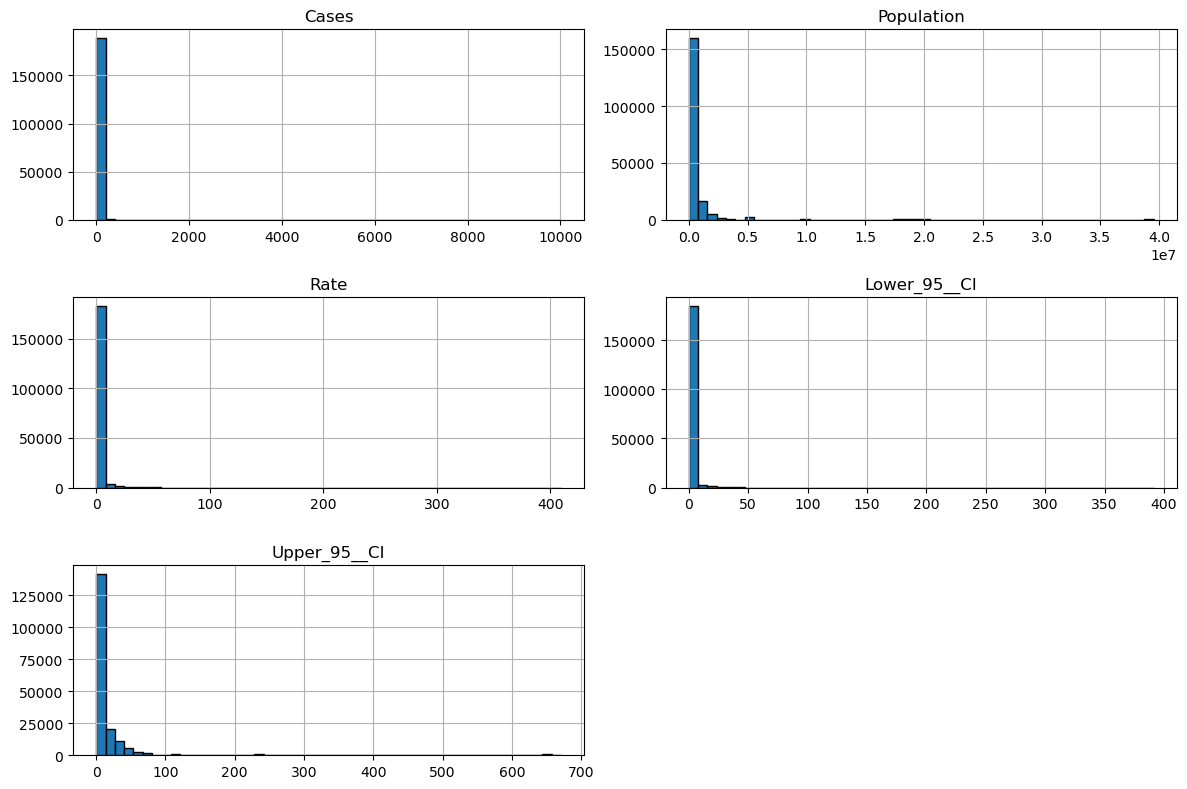

In [ ]:
import matplotlib.pyplot as plt

# List of numerical columns to plot
num_cols = ["Cases", "Population", "Rate", "Lower_95__CI", "Upper_95__CI"]
#Lower_95__CI → The lower bound of the 95% confidence interval.
#Upper_95__CI → The upper bound of the 95% confidence interval.

# Plot histograms
df[num_cols].hist(figsize=(12, 8), bins=50, edgecolor='black')
plt.tight_layout()
plt.show()


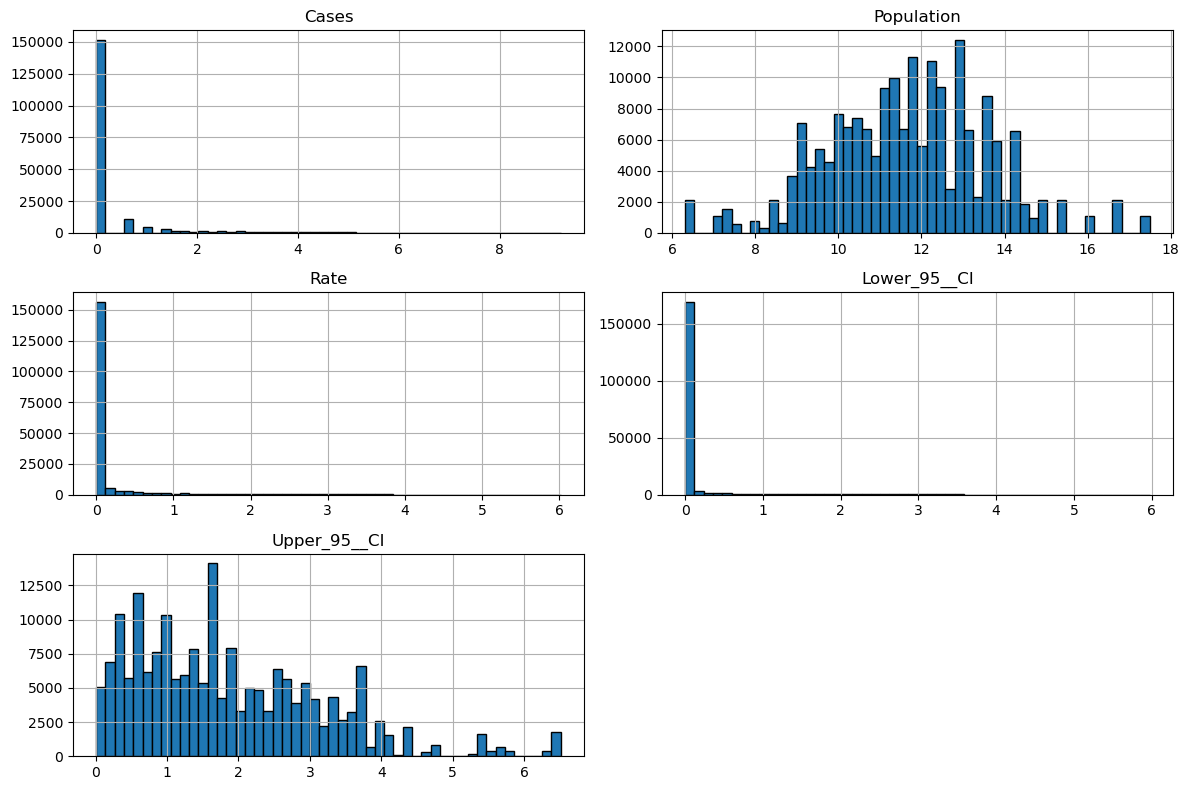

In [ ]:
import numpy as np

# Apply log transformation to key variables
log_cols = ["Cases", "Population", "Rate", "Lower_95__CI", "Upper_95__CI"]
df_log = df[log_cols].apply(lambda x: np.log1p(x))  # log1p(x) = log(x + 1) to handle zeros

# Plot transformed histograms
df_log.hist(figsize=(12, 8), bins=50, edgecolor='black')
plt.tight_layout()
plt.show()


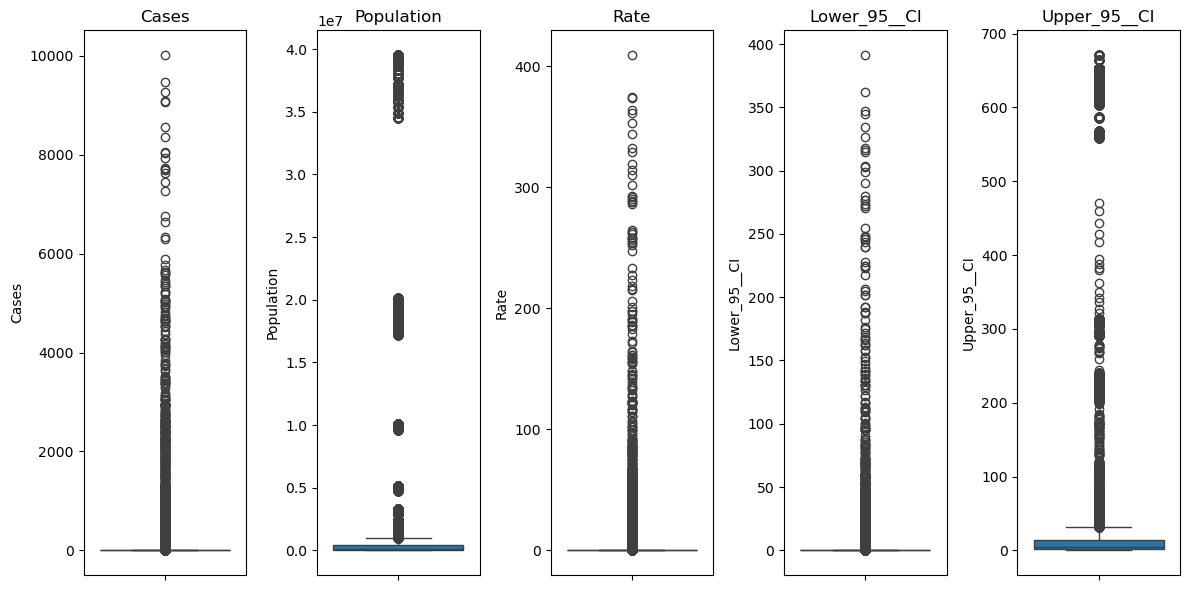

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of numerical columns to check for outliers
num_cols = ["Cases", "Population", "Rate", "Lower_95__CI", "Upper_95__CI"]

# Plot boxplots
plt.figure(figsize=(12, 6))
for i, col in enumerate(num_cols, 1):
    plt.subplot(1, 5, i)
    sns.boxplot(y=df[col])
    plt.title(col)

plt.tight_layout()
plt.show()


In [ ]:
# Function to detect outliers using IQR
def detect_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    return outliers

# Apply to key columns
outlier_cases = detect_outliers(df, "Cases")
outlier_rate = detect_outliers(df, "Rate")

# Display number of outliers
print(f"Outliers in 'Cases': {len(outlier_cases)}")
print(f"Outliers in 'Rate': {len(outlier_rate)}")


Outliers in 'Cases': 38417
Outliers in 'Rate': 38417


In [ ]:
# Calculate the 95th percentile for Cases and Rate
cases_95th = df["Cases"].quantile(0.95)
rate_95th = df["Rate"].quantile(0.95)

print(f"95th percentile for Cases: {cases_95th}")
print(f"95th percentile for Rate: {rate_95th}")


95th percentile for Cases: 18.0
95th percentile for Rate: 5.013525123458057


In [ ]:
# Capping extreme values at the 95th percentile
df["Cases"] = df["Cases"].clip(upper=cases_95th)
df["Rate"] = df["Rate"].clip(upper=rate_95th)

# Verify that extreme values are capped
print(df["Cases"].describe())
print(df["Rate"].describe())


count    189921.000000
mean          1.498702
std           4.334958
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          18.000000
Name: Cases, dtype: float64
count    189921.000000
mean          0.399984
std           1.202820
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           5.013525
Name: Rate, dtype: float64


In [ ]:
#Correlation Analysis

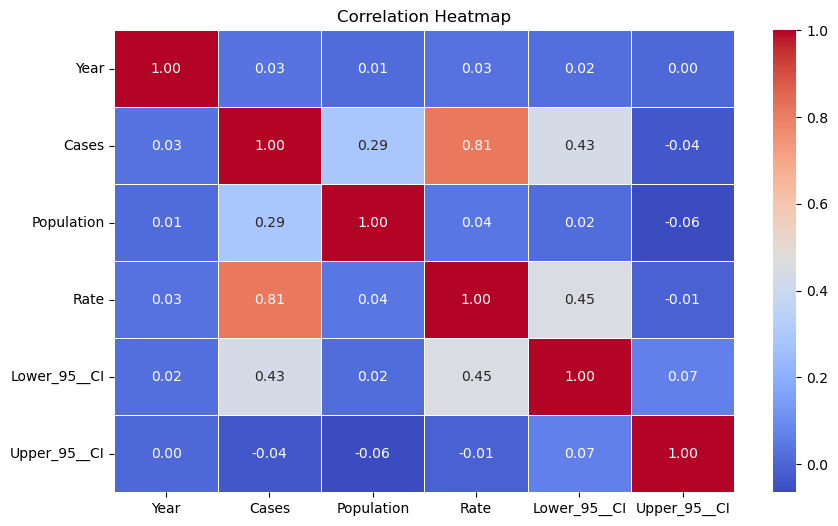

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns
numeric_df = df.select_dtypes(include=["number"])

# Compute correlation matrix
correlation_matrix = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


In [ ]:
#Time-Series Analysis

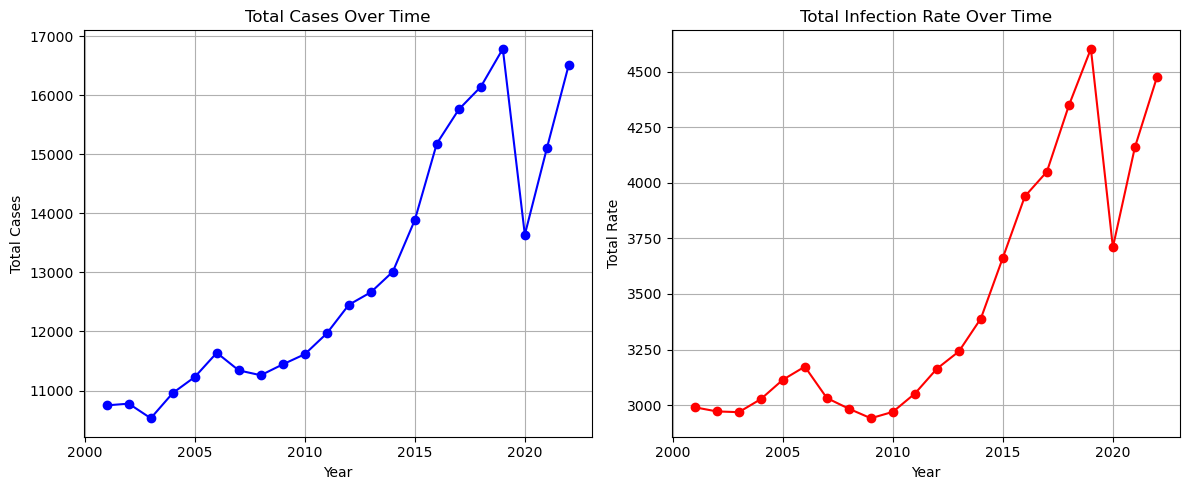

In [ ]:
import matplotlib.pyplot as plt

# Aggregate cases and rate by year
yearly_trends = df.groupby("Year")[["Cases", "Rate"]].sum()

# Plot trends
plt.figure(figsize=(12, 5))

# Plot Cases over time
plt.subplot(1, 2, 1)
plt.plot(yearly_trends.index, yearly_trends["Cases"], marker="o", linestyle="-", color="b")
plt.xlabel("Year")
plt.ylabel("Total Cases")
plt.title("Total Cases Over Time")
plt.grid()

# Plot Rate over time
plt.subplot(1, 2, 2)
plt.plot(yearly_trends.index, yearly_trends["Rate"], marker="o", linestyle="-", color="r")
plt.xlabel("Year")
plt.ylabel("Total Rate")
plt.title("Total Infection Rate Over Time")
plt.grid()

plt.tight_layout()
plt.show()


In [ ]:
# Analyze Disease-Specific Trends?

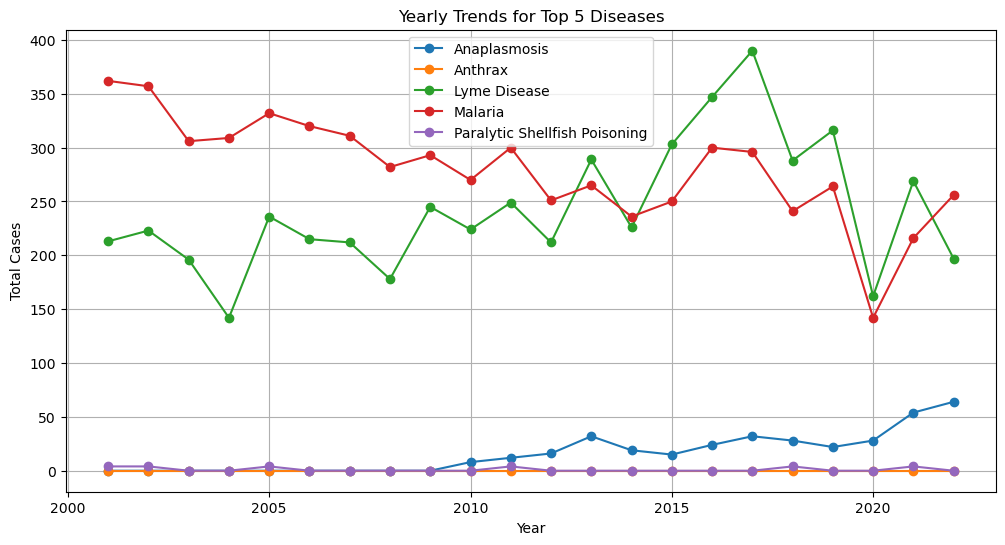

In [ ]:
# Select top 5 most common diseases
top_diseases = df["Disease"].value_counts().head(5).index

# Plot yearly trends for top diseases
plt.figure(figsize=(12, 6))

for disease in top_diseases:
    disease_trend = df[df["Disease"] == disease].groupby("Year")["Cases"].sum()
    plt.plot(disease_trend.index, disease_trend, marker="o", linestyle="-", label=disease)

plt.xlabel("Year")
plt.ylabel("Total Cases")
plt.title("Yearly Trends for Top 5 Diseases")
plt.legend()
plt.grid()
plt.show()


In [ ]:
#Identify the Most Common & Rare Diseases

C:\Users\skallu\AppData\Local\Temp\ipykernel_22136\1363114714.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=disease_counts.values, y=disease_counts.index, palette="Blues_r")


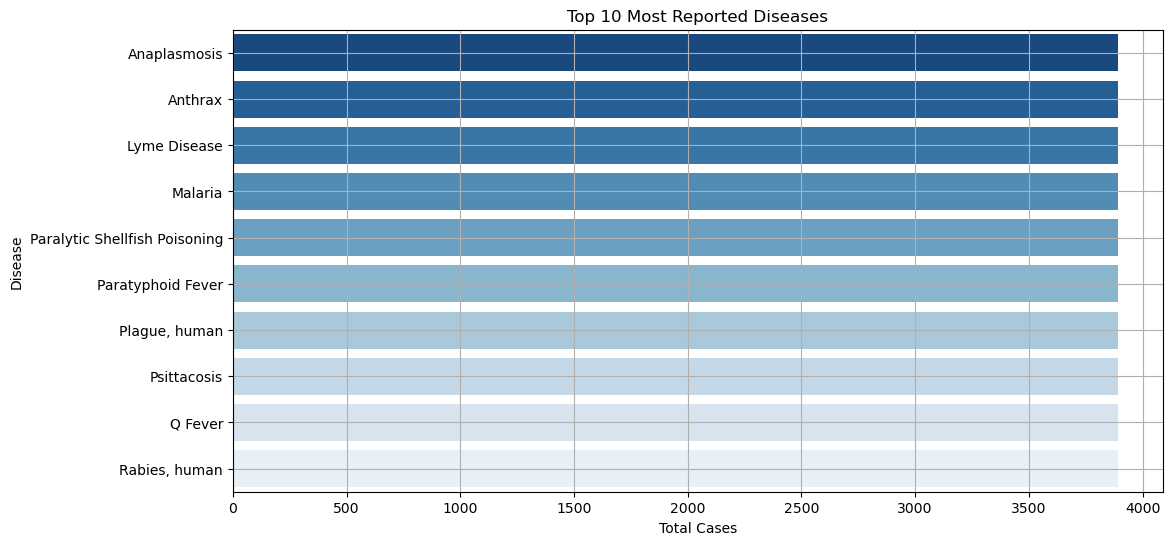

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get the top 10 most reported diseases
disease_counts = df["Disease"].value_counts().head(10)

# Plot top diseases
plt.figure(figsize=(12, 6))
sns.barplot(x=disease_counts.values, y=disease_counts.index, palette="Blues_r")
plt.xlabel("Total Cases")
plt.ylabel("Disease")
plt.title("Top 10 Most Reported Diseases")
plt.grid()
plt.show()



In [ ]:
#Find the Rarest Diseases


In [ ]:
# Get the least reported diseases
rare_diseases = df["Disease"].value_counts().tail(10)
print("Least Reported Diseases:\n", rare_diseases)


Least Reported Diseases:
 Disease
Ehrlichiosis                                                                     3894
Giardiasis                                                                       3894
Hantavirus Infection                                                             3894
Hemolytic Uremic Syndrome                                                        3894
Creutzfeldt-Jakob Disease and other Transmissible Spongiform Encephalopathies    2832
Cyclosporiasis                                                                   2124
Hepatitis E, acute infection                                                     2124
Chikungunya Virus Infection                                                      1239
Flavivirus Infection of Undetermined Species                                     1239
Zika Virus Infection                                                             1239
Name: count, dtype: int64
